In [11]:
import numpy as np

# Generate sine wave data
x = np.linspace(0, 50, 500)  # 500 points from 0 to 50
y = np.sin(x)

# Create sequences of 5 consecutive values and their corresponding next 5 values
input_seq = []
target_seq = []

for i in range(len(y) - 10):
    input_seq.append(y[i:i+5])
    target_seq.append(y[i+5:i+10])

input_seq = np.array(input_seq)
target_seq = np.array(target_seq)


In [12]:
from sklearn.model_selection import train_test_split

# Splitting the data into 80% training and 20% testing
input_train, input_test, target_train, target_test = train_test_split(input_seq, target_seq, test_size=0.2, random_state=42)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, RepeatVector, TimeDistributed

model = Sequential([
    # Encoder
    SimpleRNN(50, activation='relu', input_shape=(5, 1)),
    RepeatVector(5),  # Set the output sequence length

    # Decoder
    SimpleRNN(50, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])

model.compile(optimizer='adam', loss='mse')


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 50)                2600      
                                                                 
 repeat_vector_1 (RepeatVec  (None, 5, 50)             0         
 tor)                                                            
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 5, 50)             5050      
                                                                 
 time_distributed_1 (TimeDi  (None, 5, 1)              51        
 stributed)                                                      
                                                                 
Total params: 7701 (30.08 KB)
Trainable params: 7701 (30.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Reshape the data to fit the RNN input shape
input_seq = input_seq.reshape((input_seq.shape[0], input_seq.shape[1], 1))
target_seq = target_seq.reshape((target_seq.shape[0], target_seq.shape[1], 1))

from sklearn.model_selection import train_test_split

# Splitting the data into 80% training and 20% testing
input_train, input_test, target_train, target_test = train_test_split(input_seq, target_seq, test_size=0.2, random_state=42)

# Train the model
model.fit(input_seq, target_seq, epochs=200, batch_size=32, validation_split=0.2)


Epoch 1/200
13/13 [==============================] - 7s 37ms/step - loss: 0.2785 - val_loss: 0.1158
Epoch 2/200
13/13 [==============================] - 0s 14ms/step - loss: 0.0874 - val_loss: 0.0660
Epoch 3/200
13/13 [==============================] - 0s 15ms/step - loss: 0.0328 - val_loss: 0.0103
Epoch 4/200
13/13 [==============================] - 0s 15ms/step - loss: 0.0090 - val_loss: 0.0038
Epoch 5/200
13/13 [==============================] - 0s 15ms/step - loss: 0.0038 - val_loss: 0.0025
Epoch 6/200
13/13 [==============================] - 0s 13ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 7/200
13/13 [==============================] - 0s 15ms/step - loss: 0.0011 - val_loss: 7.7179e-04
Epoch 8/200
13/13 [==============================] - 0s 14ms/step - loss: 7.4086e-04 - val_loss: 5.9205e-04
Epoch 9/200
13/13 [==============================] - 0s 14ms/step - loss: 5.8823e-04 - val_loss: 4.6505e-04
Epoch 10/200
13/13 [==============================] - 0s 17ms/step - loss: 4.737

In [7]:
# Predict the next 5 values for a given sequence
test_seq = np.array([np.sin(1), np.sin(1.1), np.sin(1.2), np.sin(1.3), np.sin(1.4)])
test_seq = test_seq.reshape((1, 5, 1))
predicted_seq = model.predict(test_seq)
print(predicted_seq)


1/1 [==============================] - 0s 482ms/step
[[[0.99107164]
  [0.9864573 ]
  [0.97298175]
  [0.9589411 ]
  [0.92335814]]]


In [8]:
# Let's take a sample from our dataset for comparison
sample_indices = np.random.choice(len(input_seq), 5)  # Taking 5 random samples for demonstration

for idx in sample_indices:
    test_seq = input_seq[idx]
    actual_output = target_seq[idx]
    predicted_output = model.predict(test_seq.reshape(1, 5, 1))

    print("Input Sequence:", test_seq.flatten())
    print("Actual Output:", actual_output.flatten())
    print("Predicted Output:", predicted_output.flatten())
    print("------")


1/1 [==============================] - 0s 21ms/step
Input Sequence: [-0.08254699  0.01755847  0.11748779  0.21623851  0.31281998]
Actual Output: [0.40626333 0.49563116 0.58002695 0.65860408 0.73057427]
Predicted Output: [0.40812272 0.4951888  0.5786981  0.658253   0.7279467 ]
------
1/1 [==============================] - 0s 20ms/step
Input Sequence: [0.39015654 0.48030464 0.56563445 0.64528998 0.71847213]
Actual Output: [0.78444678 0.84255206 0.89220511 0.93290779 0.96425181]
Predicted Output: [0.78271973 0.83434045 0.8813733  0.92328566 0.95113593]
------
1/1 [==============================] - 0s 20ms/step
Input Sequence: [0.7770233  0.8360937  0.88677664 0.92856368 0.96103562]
Actual Output: [0.98386673 0.99682795 0.99978928 0.99272099 0.975694  ]
Predicted Output: [0.97757524 0.9835511  0.9833613  0.97963965 0.9568926 ]
------
1/1 [==============================] - 0s 26ms/step
Input Sequence: [0.87291485 0.81973317 0.75832814 0.68931578 0.6133884 ]
Actual Output: [0.53130767 0.4438

1/1 [==============================] - 0s 60ms/step


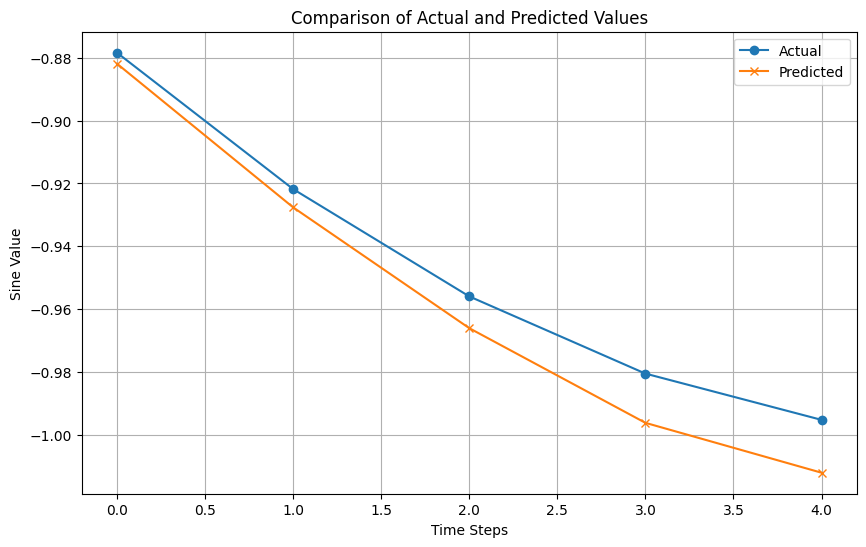

In [9]:
import matplotlib.pyplot as plt

# For demonstration, let's take a random sample from our dataset
idx = np.random.choice(len(input_seq))
test_seq = input_seq[idx]
actual_output = target_seq[idx]
predicted_output = model.predict(test_seq.reshape(1, 5, 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.arange(5), actual_output.flatten(), 'o-', label='Actual')
plt.plot(np.arange(5), predicted_output.flatten(), 'x-', label='Predicted')
plt.legend()
plt.title("Comparison of Actual and Predicted Values")
plt.xlabel("Time Steps")
plt.ylabel("Sine Value")
plt.grid(True)
plt.show()


1/1 [==============================] - 0s 28ms/step


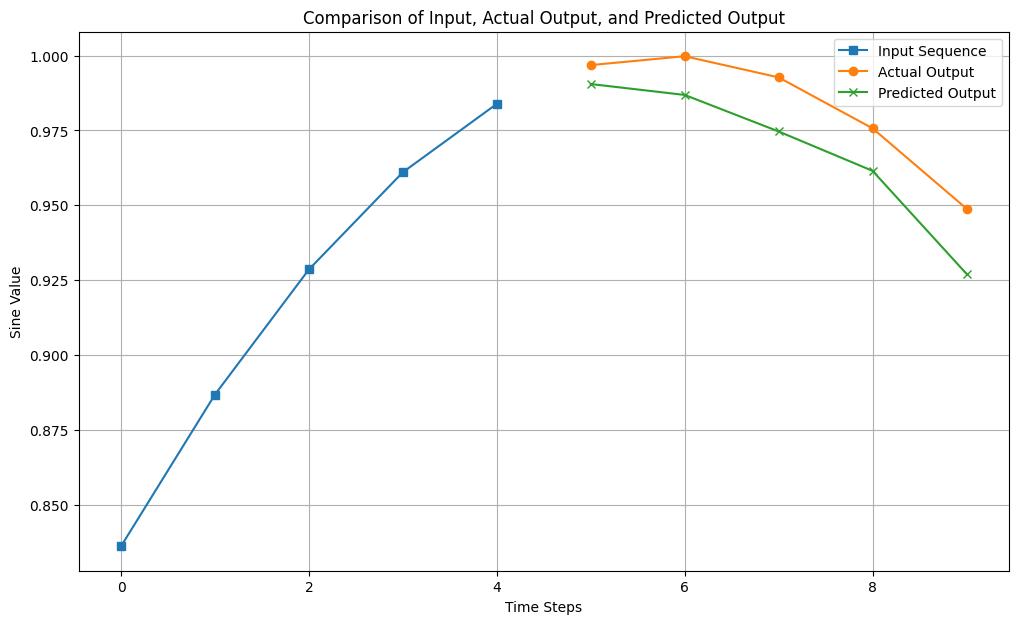

In [10]:
import matplotlib.pyplot as plt

# For demonstration, let's take a random sample from our dataset
idx = np.random.choice(len(input_seq))
test_seq = input_seq[idx]
actual_output = target_seq[idx]
predicted_output = model.predict(test_seq.reshape(1, 5, 1))

# Plotting
plt.figure(figsize=(12, 7))

# Plotting the input sequence
plt.plot(np.arange(5), test_seq.flatten(), 's-', label='Input Sequence')

# Plotting the actual and predicted output
# We offset by 5 on the x-axis to place it after the input sequence
plt.plot(np.arange(5, 10), actual_output.flatten(), 'o-', label='Actual Output')
plt.plot(np.arange(5, 10), predicted_output.flatten(), 'x-', label='Predicted Output')

plt.legend()
plt.title("Comparison of Input, Actual Output, and Predicted Output")
plt.xlabel("Time Steps")
plt.ylabel("Sine Value")
plt.grid(True)
plt.show()
